  BASIC STATISTICS

Descriptive Analytics and Data Preprocessing on Sales & Discounts Dataset
Introduction

●	To perform descriptive analytics, visualize data distributions, and preprocess the dataset for further analysis.

Descriptive Analytics for Numerical Columns

●	Objective: To compute and analyze basic statistical measures for numerical columns in the dataset.

●	Steps:
	Load the dataset into a data analysis tool or programming environment (e.g., Python with pandas library).
	Identify numerical columns in the dataset.
	Calculate the mean, median, mode, and standard deviation for these columns.
	Provide a brief interpretation of these statistics.

  
Data Visualization

●	Objective: To visualize the distribution and relationship of numerical and categorical variables in the dataset.

●	Histograms:
	Plot histograms for each numerical column.
	Analyze the distribution (e.g., skewness, presence of outliers) and provide inferences.

●	Box Plots:
	Create boxplots for numerical variables to identify outliers and the interquartile range.
	Discuss any findings, such as extreme values or unusual distributions.

●	Bar Chart Analysis for Categorical Column:
	Identify categorical columns in the dataset.
	Create bar charts to visualize the frequency or count of each category.
	Analyze the distribution of categories and provide insights.

Conclusion

●	Summarize the key findings from the descriptive analytics and data visualizations.



In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("sales_data_with_discounts.csv")
df.head()

,Date,Day,SKU,City,Volume,BU,Brand,Model,Avg Price,Total Sales Value,Discount Rate (%),Discount Amount,Net Sales Value
0,01-04-2021,Thursday,M01,C,15,Mobiles,RealU,RU-10,12100,181500,11.654820,21153.498820,160346.501180
1,01-04-2021,Thursday,M02,C,10,Mobiles,RealU,RU-9 Plus,10100,101000,11.560498,11676.102961,89323.897039
2,01-04-2021,Thursday,M03,C,7,Mobiles,YouM,YM-99,16100,112700,9.456886,10657.910157,102042.089843
3,01-04-2021,Thursday,M04,C,6,Mobiles,YouM,YM-99 Plus,20100,120600,6.935385,8364.074702,112235.925298
4,01-04-2021,Thursday,M05,C,3,Mobiles,YouM,YM-98,8100,24300,17.995663,4372.946230,19927.053770


Descriptive Analysis of Numerical Columns

In [3]:
#selecting only the names of column by selecting only numerical columns (integer and float) from the dataframe
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns
numerical_cols

Index(['Volume', 'Avg Price', 'Total Sales Value', 'Discount Rate (%)',
       'Discount Amount', 'Net Sales Value'],
      dtype='object')

In [4]:
#calculating mean, median, mode and standard deviation
for col in numerical_cols:    #loop through each numerical column in the data frame
    print(f"\nColumn: {col}")     #prints the name of column
    print("Mean:", df[col].mean())
    print("Median:", df[col].median())
    print("Mode:", df[col].mode()[0])     #mode can return multiple values so we take the first value
    print("Standard Deviation:", df[col].std())


Column: Volume
Mean: 5.066666666666666
Median: 4.0
Mode: 3
Standard Deviation: 4.231602391213926

Column: Avg Price
Mean: 10453.433333333332
Median: 1450.0
Mode: 400
Standard Deviation: 18079.90483993645

Column: Total Sales Value
Mean: 33812.83555555555
Median: 5700.0
Mode: 24300
Standard Deviation: 50535.07417255328

Column: Discount Rate (%)
Mean: 15.155241895330914
Median: 16.57776564929597
Mode: 5.007822189204133
Standard Deviation: 4.220602153325511

Column: Discount Amount
Mean: 3346.499424342415
Median: 988.9337332382784
Mode: 69.17794228822787
Standard Deviation: 4509.9029633539985

Column: Net Sales Value
Mean: 30466.336131270138
Median: 4677.788059301853
Mode: 326.97480055470817
Standard Deviation: 46358.656624066934


Data Visualization

Skewness > 0 → Right-skewed 
Skewness < 0 → Left-skewed 
Skewness ≈ 0 → Symmetric distribution

Volume - Skewness: 2.731723626557714
Avg Price - Skewness: 1.9088730767759727
Total Sales Value - Skewness: 1.5347293238977937
Discount Rate (%) - Skewness: -1.0622943696988825
Discount Amount - Skewness: 1.9130377339538271
Net Sales Value - Skewness: 1.5408217575344376

Column: Volume
Number of outliers: 44

Column: Avg Price
Number of outliers: 60

Column: Total Sales Value
Number of outliers: 36

Column: Discount Rate (%)
Number of outliers: 45

Column: Discount Amount
Number of outliers: 24

Column: Net Sales Value
Number of outliers: 35


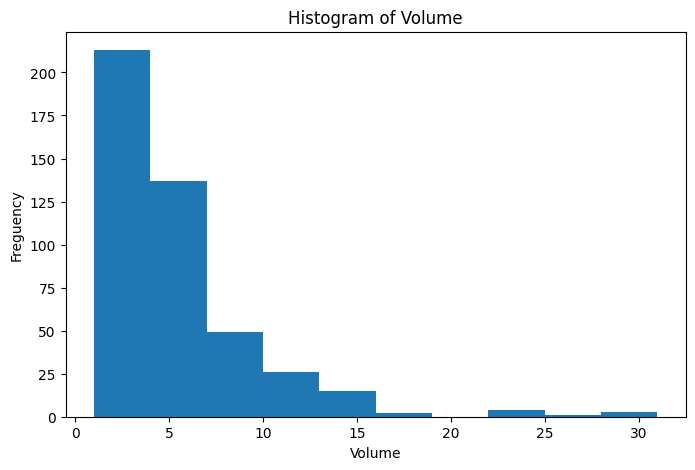

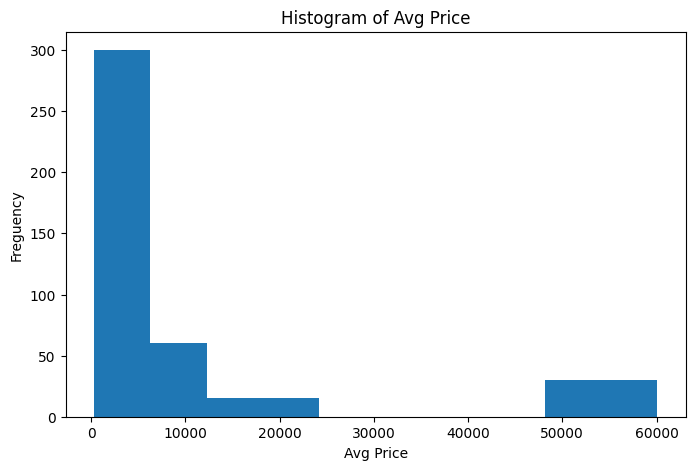

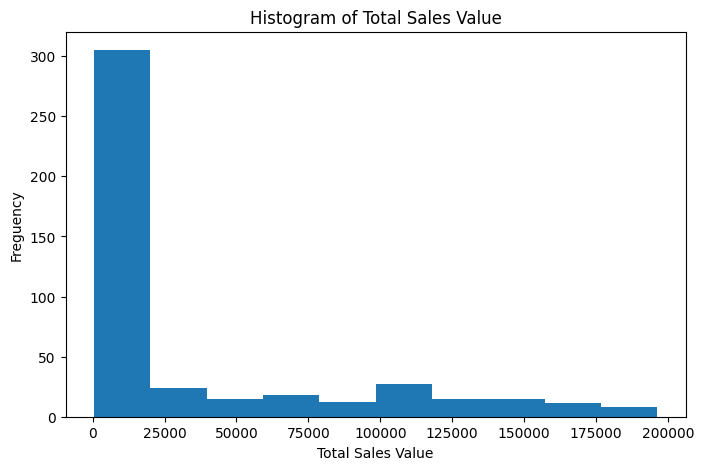

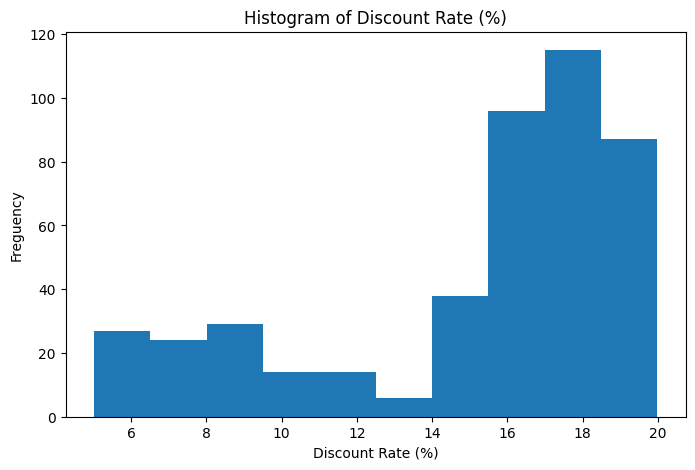

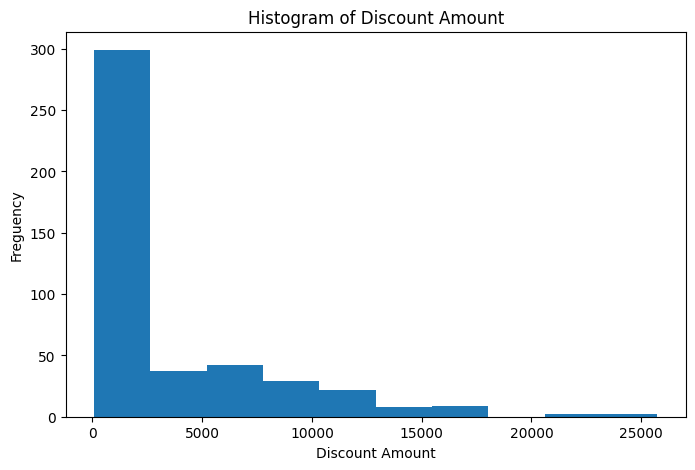

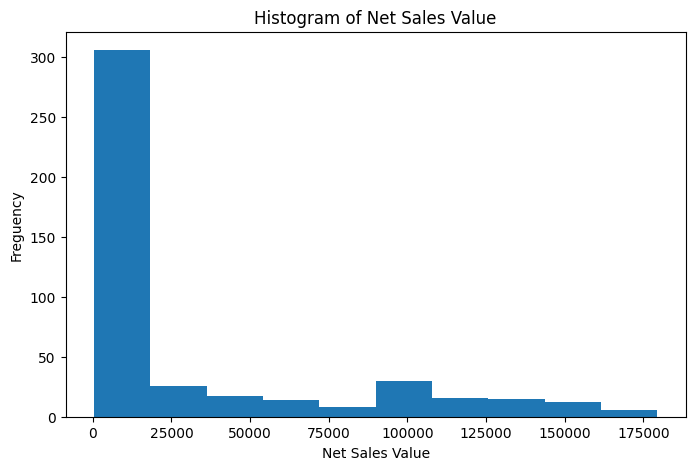

In [5]:
#skewness for numerical columns
print(f"Skewness > 0 → Right-skewed \nSkewness < 0 → Left-skewed \nSkewness ≈ 0 → Symmetric distribution\n")

#loop through numerical columns
for col in numerical_cols:
    skew_value = df[col].skew()     #calculates the skewness of the column
    print(f"{col} - Skewness: {skew_value}")

#outlier detection using  IQR
for col in numerical_cols:
    Q1 = df[col].quantile(0.25)     #calculate for first quartile(Q1)
    Q3 = df[col].quantile(0.75)     #calculate for third quartile(Q3)
    IQR = Q3 - Q1                   #calcualte interquartile range(Q2)

    #defining lower and upple bounds for outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR


    #identify outliers rows based on IQR limits
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]

    print(f"\nColumn: {col}")
    print(f"Number of outliers: {outliers.shape[0]}")

#loop through each numerical columns to visualize distribution
for col in numerical_cols:
  plt.figure(figsize = (8, 5))      #figsoze for each histogram
  plt.hist(df[col])
  plt.title(f"Histogram of {col}")
  plt.xlabel(col)
  plt.ylabel("Freguency")
  plt.show()


Box Plots


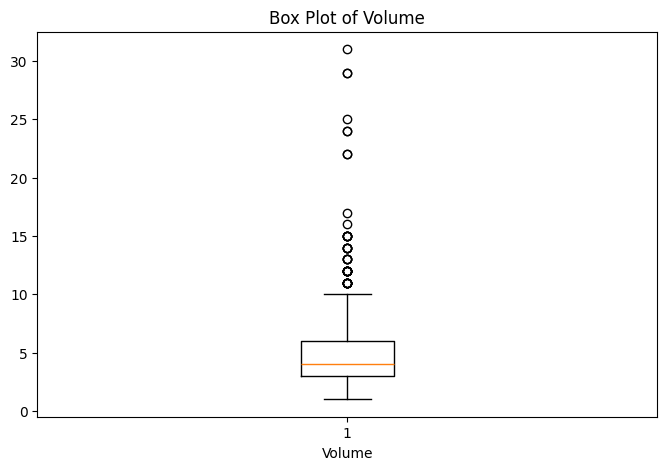

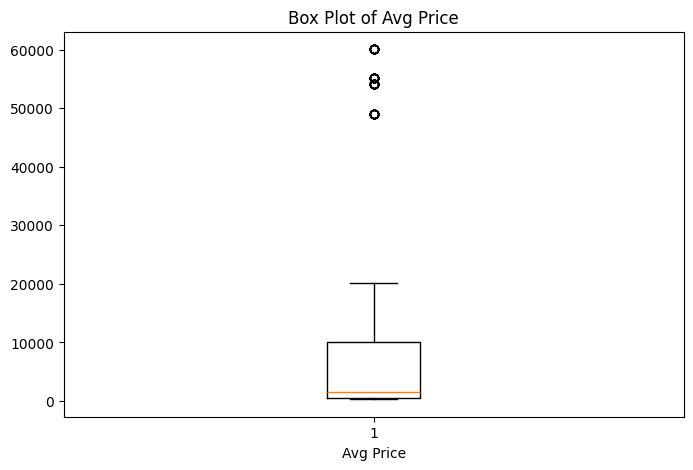

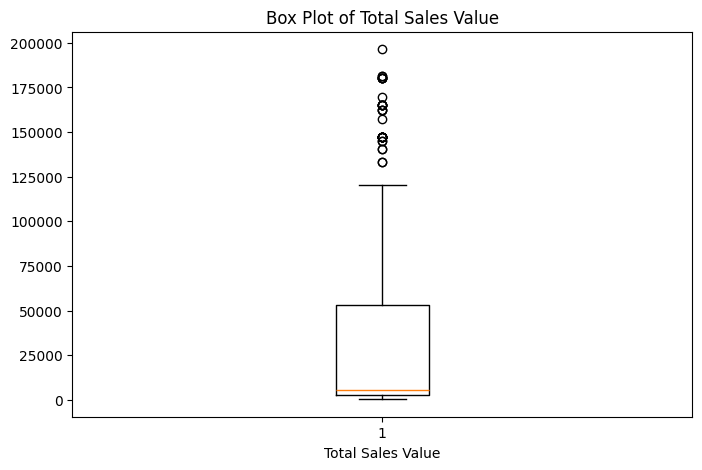

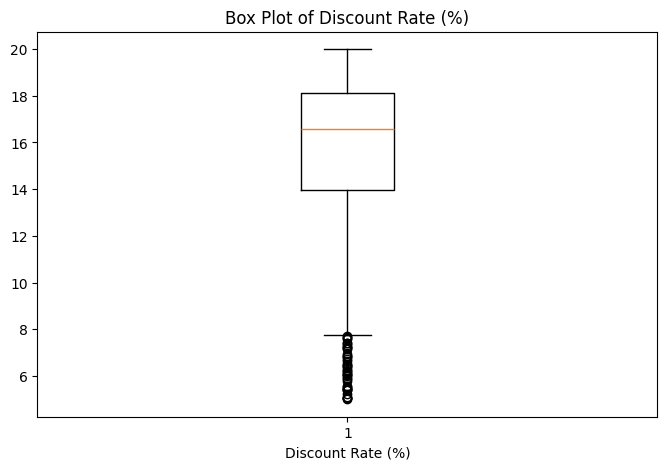

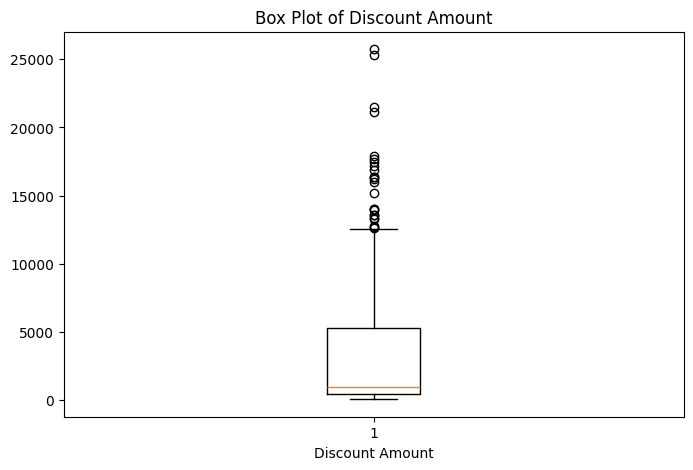

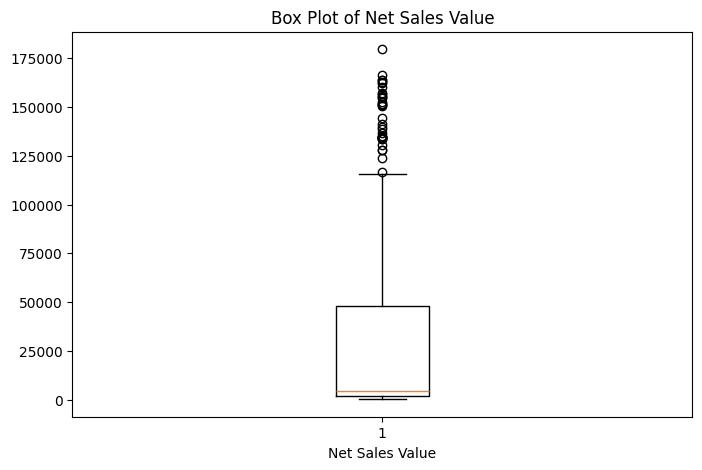

In [6]:
#loop through each numerical columns
for col in numerical_cols:
  plt.figure(figsize = (8, 5))    #figure size for each box plots
  plt.boxplot(df[col])
  plt.title(f"Box Plot of {col}")
  plt.xlabel(col)
  plt.show()

In [7]:
#calculate IQR and Outliers

#looping through each numerical columns
for col in numerical_cols:
    Q1 = df[col].quantile(0.25)   #calcuate the first quartile(Q1)

    Q3 = df[col].quantile(0.75)   #calculate the third quartile(Q3)

    IQR = Q3 - Q1                 #compute the interquartile range(IQR)

    #define lover and upper limits for detecting outliers
    lower_limit = Q1 - 1.5 * IQR
    upper_limit = Q3 + 1.5 * IQR

    #identify rows where values fall outside the IQR range
    outliers = df[(df[col] < lower_limit) | (df[col] > upper_limit)]

    print(f"\nColumn: {col}")
    print(f"Q1: {Q1}")
    print(f"Q3: {Q3}")
    print(f"IQR: {IQR}")
    print(f"Lower Limit: {lower_limit}")
    print(f"Upper Limit: {upper_limit}")
    print(f"Number of Outliers: {outliers.shape[0]}")



Column: Volume
Q1: 3.0
Q3: 6.0
IQR: 3.0
Lower Limit: -1.5
Upper Limit: 10.5
Number of Outliers: 44

Column: Avg Price
Q1: 465.0
Q3: 10100.0
IQR: 9635.0
Lower Limit: -13987.5
Upper Limit: 24552.5
Number of Outliers: 60

Column: Total Sales Value
Q1: 2700.0
Q3: 53200.0
IQR: 50500.0
Lower Limit: -73050.0
Upper Limit: 128950.0
Number of Outliers: 36

Column: Discount Rate (%)
Q1: 13.965062543701741
Q3: 18.114718477752703
IQR: 4.149655934050962
Lower Limit: 7.740578642625298
Upper Limit: 24.339202378829146
Number of Outliers: 45

Column: Discount Amount
Q1: 460.4593038855329
Q3: 5316.4954266866525
IQR: 4856.03612280112
Lower Limit: -6823.594880316146
Upper Limit: 12600.54961088833
Number of Outliers: 24

Column: Net Sales Value
Q1: 2202.2086453212287
Q3: 47847.91285159138
IQR: 45645.70420627015
Lower Limit: -66266.347664084
Upper Limit: 116316.46916099661
Number of Outliers: 35


Bar Chart

In [8]:
#selecting categorical columns with object data type
categorical_cols = df.select_dtypes(include=['object']).columns
categorical_cols

Index(['Date', 'Day', 'SKU', 'City', 'BU', 'Brand', 'Model'], dtype='object')

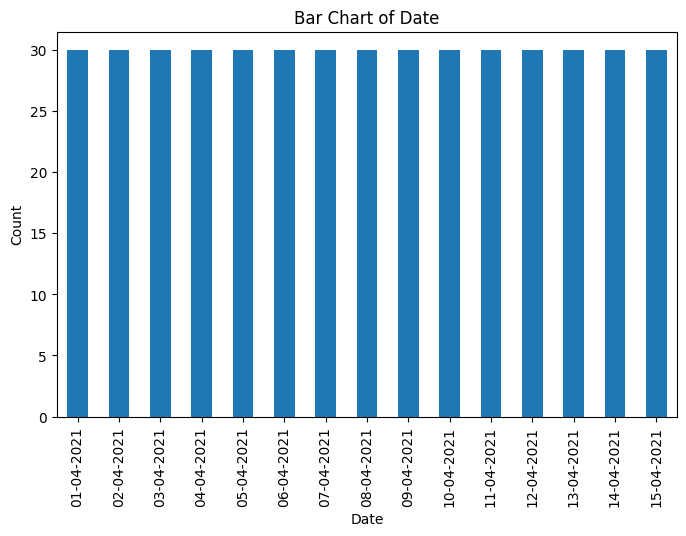

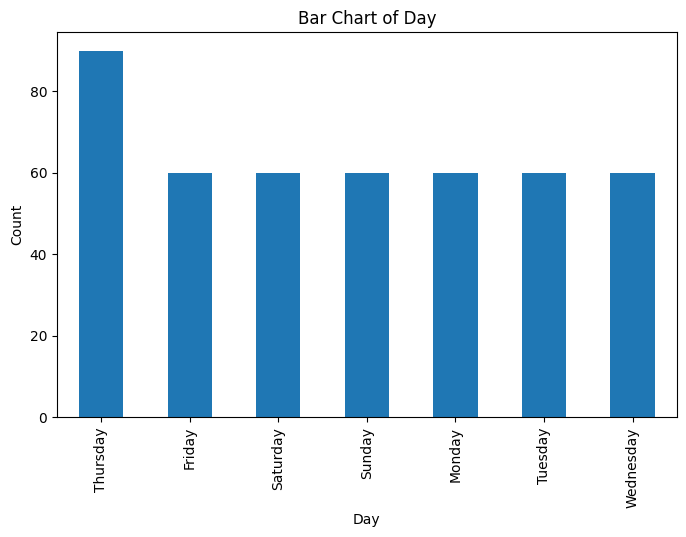

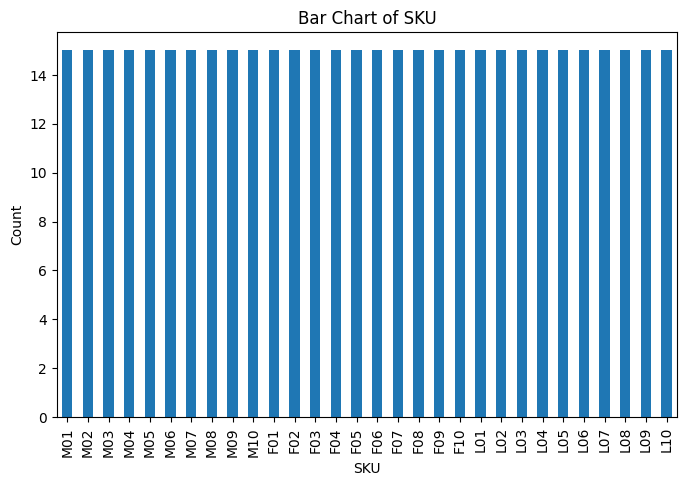

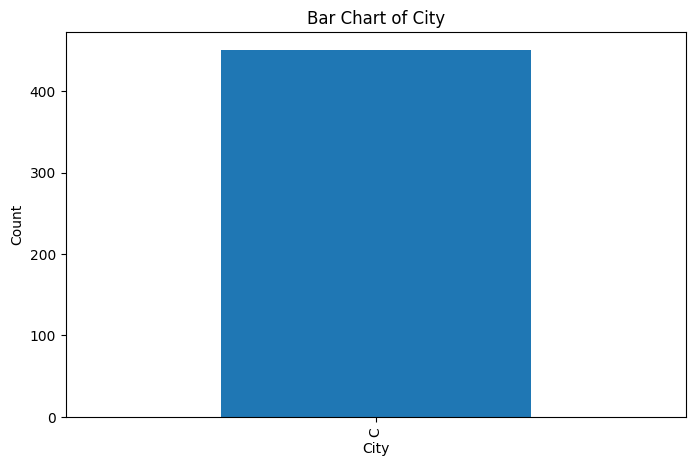

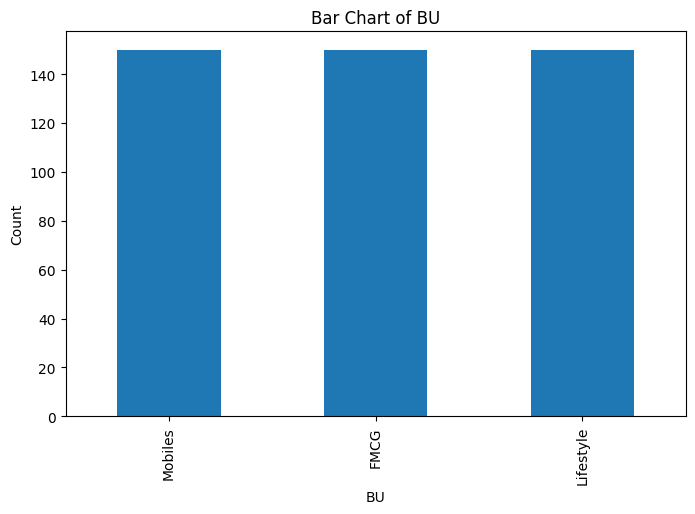

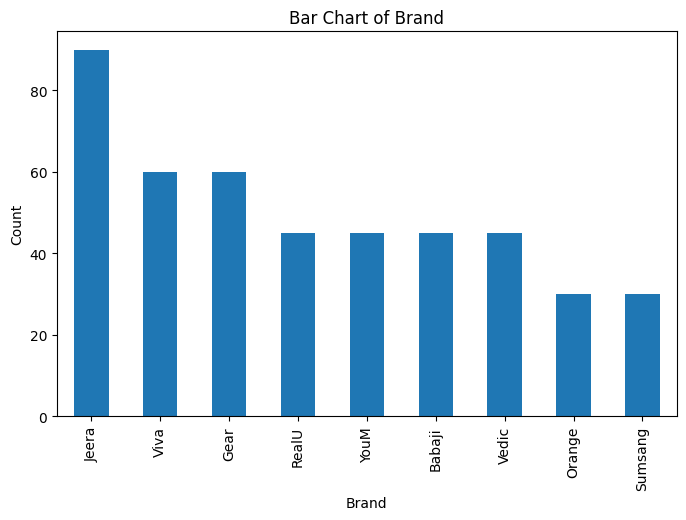

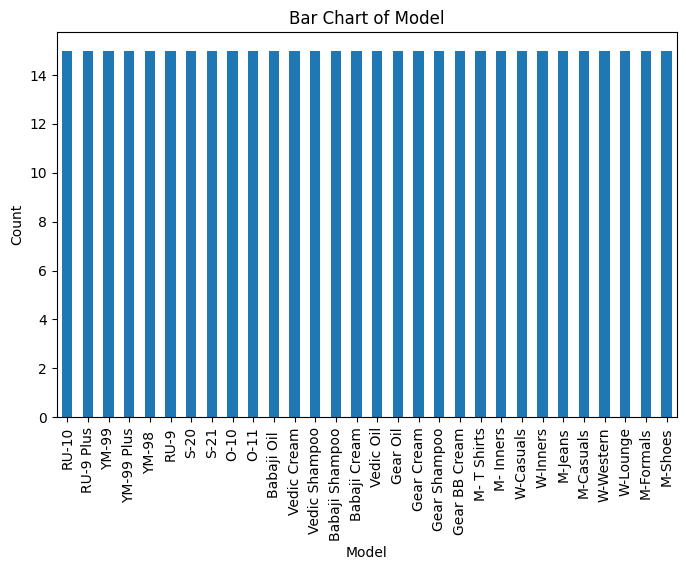

In [9]:
#loop through each categorical columns
for col in categorical_cols:
  plt.figure(figsize = (8, 5))      #create new figure for each bar chart
  df[col].value_counts().plot(kind = 'bar')     #plotting bar chart showing count of each category
  plt.title(f"Bar Chart of {col}")
  plt.xlabel(col)
  plt.ylabel("Count")

In [10]:
#frequency count for each unique category
for col in categorical_cols:
    print(f"\nColumn: {col}")
    print(df[col].value_counts())



Column: Date
Date
01-04-2021    30
02-04-2021    30
03-04-2021    30
04-04-2021    30
05-04-2021    30
06-04-2021    30
07-04-2021    30
08-04-2021    30
09-04-2021    30
10-04-2021    30
11-04-2021    30
12-04-2021    30
13-04-2021    30
14-04-2021    30
15-04-2021    30
Name: count, dtype: int64

Column: Day
Day
Thursday     90
Friday       60
Saturday     60
Sunday       60
Monday       60
Tuesday      60
Wednesday    60
Name: count, dtype: int64

Column: SKU
SKU
M01    15
M02    15
M03    15
M04    15
M05    15
M06    15
M07    15
M08    15
M09    15
M10    15
F01    15
F02    15
F03    15
F04    15
F05    15
F06    15
F07    15
F08    15
F09    15
F10    15
L01    15
L02    15
L03    15
L04    15
L05    15
L06    15
L07    15
L08    15
L09    15
L10    15
Name: count, dtype: int64

Column: City
City
C    450
Name: count, dtype: int64

Column: BU
BU
Mobiles      150
FMCG         150
Lifestyle    150
Name: count, dtype: int64

Column: Brand
Brand
Jeera      90
Viva       60
Gear   

CONCLUSION

The descriptive analysis shows that most sales related values like volume, price, total sales valus, discount amount and net sales value are right-skewed with mean higher than the median. Discount rates shows realively balanced distribution with lower variability. Histograms revealed most numerical values are right skewed, with data concentrated at lower values and long tails towards higher values indicating presence of outliers. Box plots confirmed these observations by identifying multiple extreme values in sales and price realted columns and wide interquartile ranges. Bar chart analysis of categorical columns showed that certain brands and businesses units dominate while others are more evenly distributed.